#  Machine Learning sobre Pistachos

### Primero importamos todas las librerias que usaremos

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [243]:
warnings.filterwarnings("ignore") 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Comprobaciones y limpieza

### Cargamos todos los datos del dataset y los guardamos en un dataframe

In [244]:
df=pd.read_excel("Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx")

In [245]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


### Comprobaremos que todo esta en orden, que no hay nulos ni fallos

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

In [247]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [248]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


In [249]:
df.describe(include=["object"]) 

,Class
count,2148
unique,2
top,Kirmizi_Pistachio
freq,1232


### Aqui podemos ver que hay 2 tipos de pistachos y el más frecuente es el Kirmizi_Pistachio, así que comprobaremos si los datos estan muy descompensados

In [250]:
df["Class"].value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

### Vemos que esta balanceado y no habrá problemas en el futuro

# Mini EDA de la base de datos

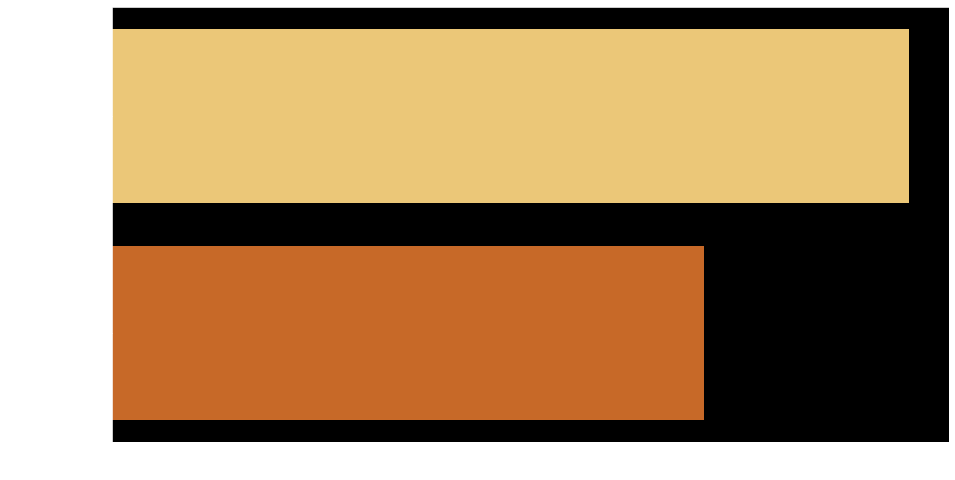

In [251]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.countplot(data=df,y="Class", palette="YlOrBr")
    plt.savefig("IMG/countpistacho.png", transparent=True)
plt.show()


In [252]:
#Aquí estamos convirtiendo los resultados de class en 1 y 0 para entrenar el modelo
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Class"]=oe.fit_transform(df[["Class"]])

In [253]:
df.Class

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2143    1.0
2144    1.0
2145    1.0
2146    1.0
2147    1.0
Name: Class, Length: 2148, dtype: float64

In [254]:
df.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
AREA,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,-0.892493,-0.652205,0.545091,0.297043,0.589226
PERIMETER,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,-0.081031,0.279590,0.047527,-0.631700,0.145290
MAJOR_AXIS,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,-0.391310,-0.796526,-0.208956,0.201741,0.136845
MINOR_AXIS,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,-0.851167,-0.087657,0.771658,-0.181450,0.668126
ECCENTRICITY,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,0.580983,-0.394392,-0.855222,0.325602,-0.546759
EQDIASQ,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,-0.906893,-0.665368,0.541747,0.302469,0.577300
SOLIDITY,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,-0.380619,-0.727156,0.215860,0.949501,0.125347
CONVEX_AREA,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,-0.834649,-0.447161,0.511311,-0.017052,0.584618
EXTENT,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,-0.369237,-0.510576,0.245638,0.650896,0.100200
ASPECT_RATIO,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,0.677735,-0.315574,-0.892523,0.250587,-0.581469


In [255]:
# Observamos que variables tienen mejor correlacion con Class
df.corr()["Class"].sort_values(ascending=False)


Class            1.000000
MINOR_AXIS       0.668126
SHAPEFACTOR_3    0.626304
COMPACTNESS      0.624939
AREA             0.589226
CONVEX_AREA      0.584618
EQDIASQ          0.577300
PERIMETER        0.145290
MAJOR_AXIS       0.136845
SOLIDITY         0.125347
ROUNDNESS        0.105768
EXTENT           0.100200
SHAPEFACTOR_4    0.063084
SHAPEFACTOR_2   -0.126188
ECCENTRICITY    -0.546759
ASPECT_RATIO    -0.581469
SHAPEFACTOR_1   -0.615513
Name: Class, dtype: float64

In [256]:
corr = df[["MINOR_AXIS", "SHAPEFACTOR_3", "COMPACTNESS", "AREA", "CONVEX_AREA", "EQDIASQ", "Class"]].corr()
corr

,MINOR_AXIS,SHAPEFACTOR_3,COMPACTNESS,AREA,CONVEX_AREA,EQDIASQ,Class
MINOR_AXIS,1.000000,0.771658,0.773512,0.795881,0.890003,0.793155,0.668126
SHAPEFACTOR_3,0.771658,1.000000,0.998625,0.545091,0.511311,0.541747,0.626304
COMPACTNESS,0.773512,0.998625,1.000000,0.551711,0.515907,0.549971,0.624939
AREA,0.795881,0.545091,0.551711,1.000000,0.943877,0.997399,0.589226
CONVEX_AREA,0.890003,0.511311,0.515907,0.943877,1.000000,0.940651,0.584618
EQDIASQ,0.793155,0.541747,0.549971,0.997399,0.940651,1.000000,0.577300
Class,0.668126,0.626304,0.624939,0.589226,0.584618,0.577300,1.000000


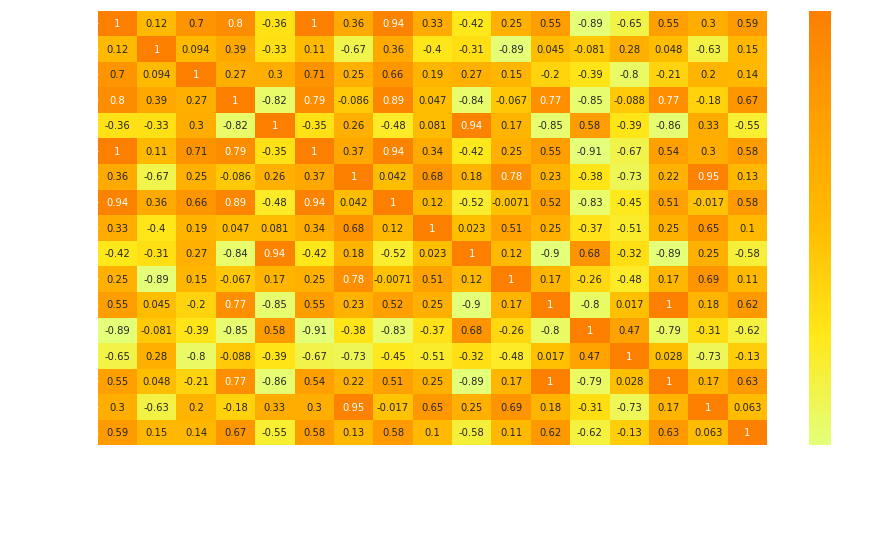

In [257]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(df.corr(),annot=True,cmap="Wistia")
    plt.savefig("IMG/correlacion.png", transparent=True)
    plt.show()


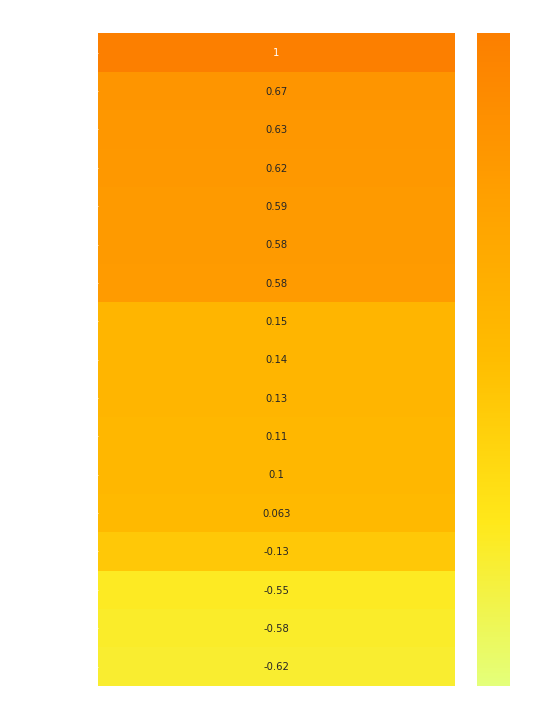

In [258]:
plt.figure(figsize=(8, 12))
with plt.style.context('dark_background'):
    heatmap = sns.heatmap(df.corr()[["Class"]].sort_values(by="Class", ascending=False), vmin=-1, vmax=1, annot=True, cmap='Wistia')
    heatmap.set_title("Correlación con Class", fontdict={'fontsize':18}, pad=13);
    plt.savefig("IMG/corr.png", transparent=True)

# Ahora toca separar los datos en test y train

In [259]:
df.columns


Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [260]:
#Separamos X e y
X = df.iloc[:,:-1]
y = df.Class

In [261]:
#Hacemos el train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Primero probaremos el modelo KNN

In [262]:
# Entrenamos el modelo con los datos
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

# Guardamos la predicción
y_pred=knn.predict(X_test)

#Calculamos el score
print("Score from y_pred:", accuracy_score(y_test,y_pred))

Score from y_pred: 0.7541899441340782


### Hemos obtenido un score del 75%, pero vamos a ver precision, recall y f1-score

In [263]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       304
         1.0       0.72      0.71      0.71       233

    accuracy                           0.75       537
   macro avg       0.75      0.75      0.75       537
weighted avg       0.75      0.75      0.75       537



## Vamos a ver de manera más gráfica los errores del modelo

In [264]:
matrix = confusion_matrix(y_test,y_pred)

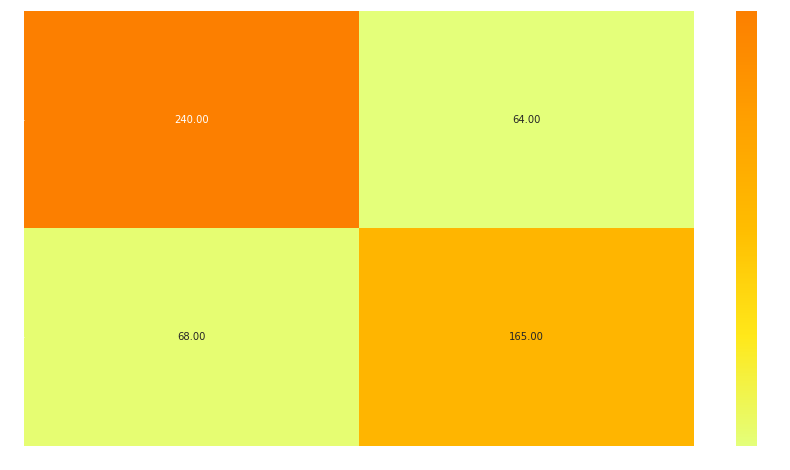

In [265]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(matrix, annot=True, cmap='Wistia', fmt='.2f')
    plt.savefig("IMG/error1.png", transparent=True)

### Vamos a modificar algunos Hyper Parametros de KNN

In [266]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    ac=accuracy_score(y_test,ypred)
    accuracy.append(ac)

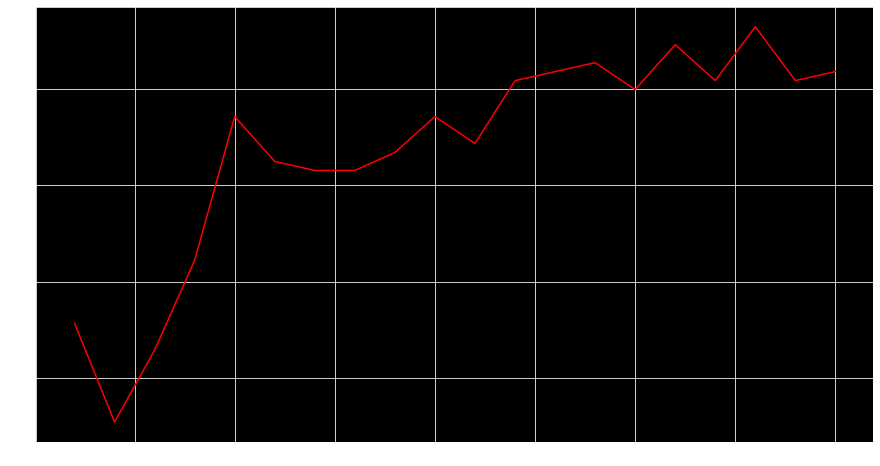

In [267]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    plt.plot(range(1,21),accuracy, color="red")
    plt.grid(True)
    plt.savefig("IMG/KNN.png", transparent=True)
    plt.show()

## Con esta gráfica analizamos que el mejor resultado es 19

In [268]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7616387337057728

In [269]:
cvs=cross_val_score(knn,X,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.75813953 0.76046512 0.78372093 0.76689977 0.78554779]
CVS Mean: 0.7709546267685803
CVS Standard Deviation: 0.01154674920635349


In [270]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       304
         1.0       0.73      0.72      0.72       233

    accuracy                           0.76       537
   macro avg       0.76      0.76      0.76       537
weighted avg       0.76      0.76      0.76       537



In [271]:
matrix = confusion_matrix(y_test,y_pred)

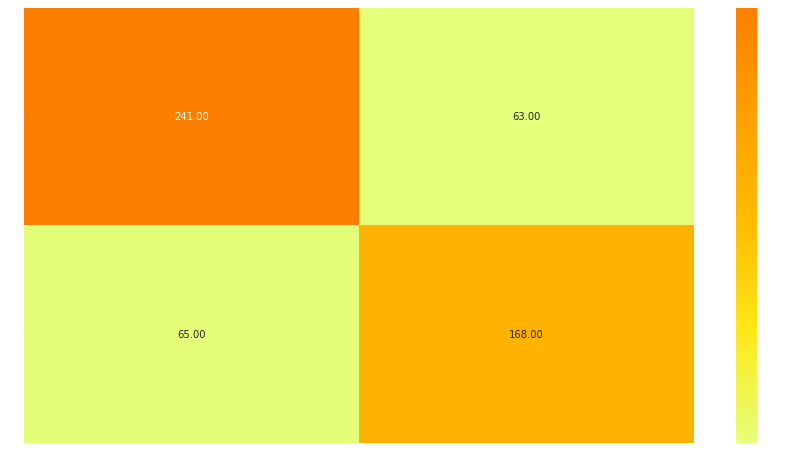

In [272]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(matrix, annot=True, cmap='Wistia', fmt='.2f')
    plt.savefig("IMG/knn2error.png", transparent=True)

### Obtenemos mejores resultados pero vamos a seguir probando, buscamos optimizar los resultados

In [273]:
#Probamos entrenando el modelo de Bagging
bg=BaggingClassifier(knn)
bg.fit(X_train,y_train)
ypred=bg.predict(X_test)
accuracy_score(y_test,ypred)


0.7616387337057728

In [274]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       304
         1.0       0.73      0.73      0.73       233

    accuracy                           0.76       537
   macro avg       0.76      0.76      0.76       537
weighted avg       0.76      0.76      0.76       537



# Toca probar la Regresión Logística

In [275]:
#Entrenamos el modelo
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
ypred=logreg.predict(X_test)

In [276]:
accuracy_score(y_test,ypred)

0.8677839851024208

In [277]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       304
         1.0       0.86      0.83      0.85       233

    accuracy                           0.87       537
   macro avg       0.87      0.86      0.86       537
weighted avg       0.87      0.87      0.87       537



### Obtenemos mejores resultados comparando con KNN

In [278]:
matrix2 = confusion_matrix(y_test,ypred)


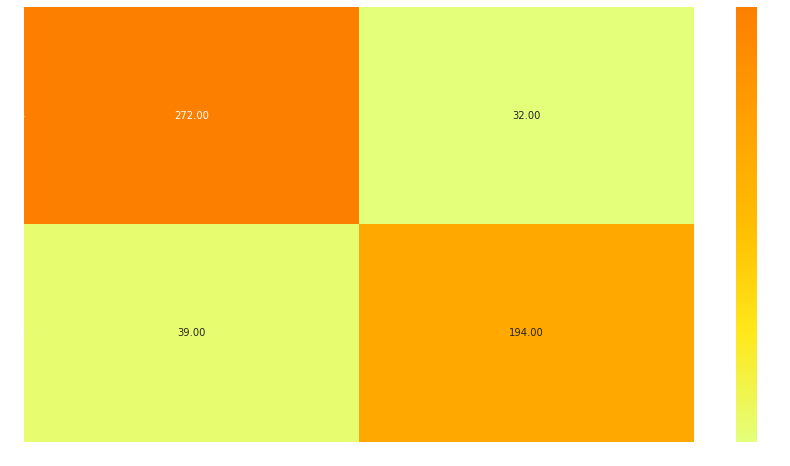

In [279]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(matrix2, annot=True, cmap='Wistia', fmt= ".2f")
    plt.savefig("IMG/regresionerror.png", transparent=True)

### Tuneamos otra vez los hyper parametros y buscamos con grid la forma más optima

In [280]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [281]:
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.879 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.848 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [282]:
grid.best_params_



{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [283]:
grid.best_score_


0.8702574851450878

In [284]:
grid.best_estimator_


LogisticRegression(C=1000.0, solver='newton-cg')

In [285]:
#Ahora que encontramos los mejores parametros podemos entrenar el modelo 
logreg=grid.best_estimator_
logreg.fit(X_train,y_train)
ypred=logreg.predict(X_test)

In [286]:
accuracy_score(y_test,ypred)


0.8640595903165735

In [287]:
cvs=cross_val_score(logreg,X,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.86744186 0.87906977 0.85813953 0.85547786 0.88344988]
CVS Mean: 0.8687157803436873
CVS Standard Deviation: 0.011072681137042099


In [288]:
matrix2 = confusion_matrix(y_test,ypred)

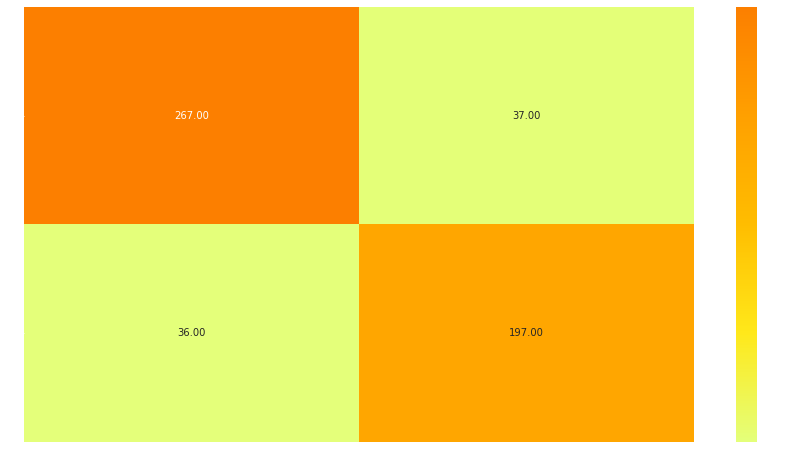

In [289]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(matrix2, annot=True, cmap='Wistia', fmt= ".2f")
    plt.savefig("IMG/log_22.png", transparent=True)

# Vamos a probar con el arbol de decisión

In [290]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)

In [291]:
accuracy_score(y_test,ypred)

0.7970204841713222

In [292]:
confusion_matrix(y_test,ypred)


array([[242,  62],
       [ 47, 186]], dtype=int64)

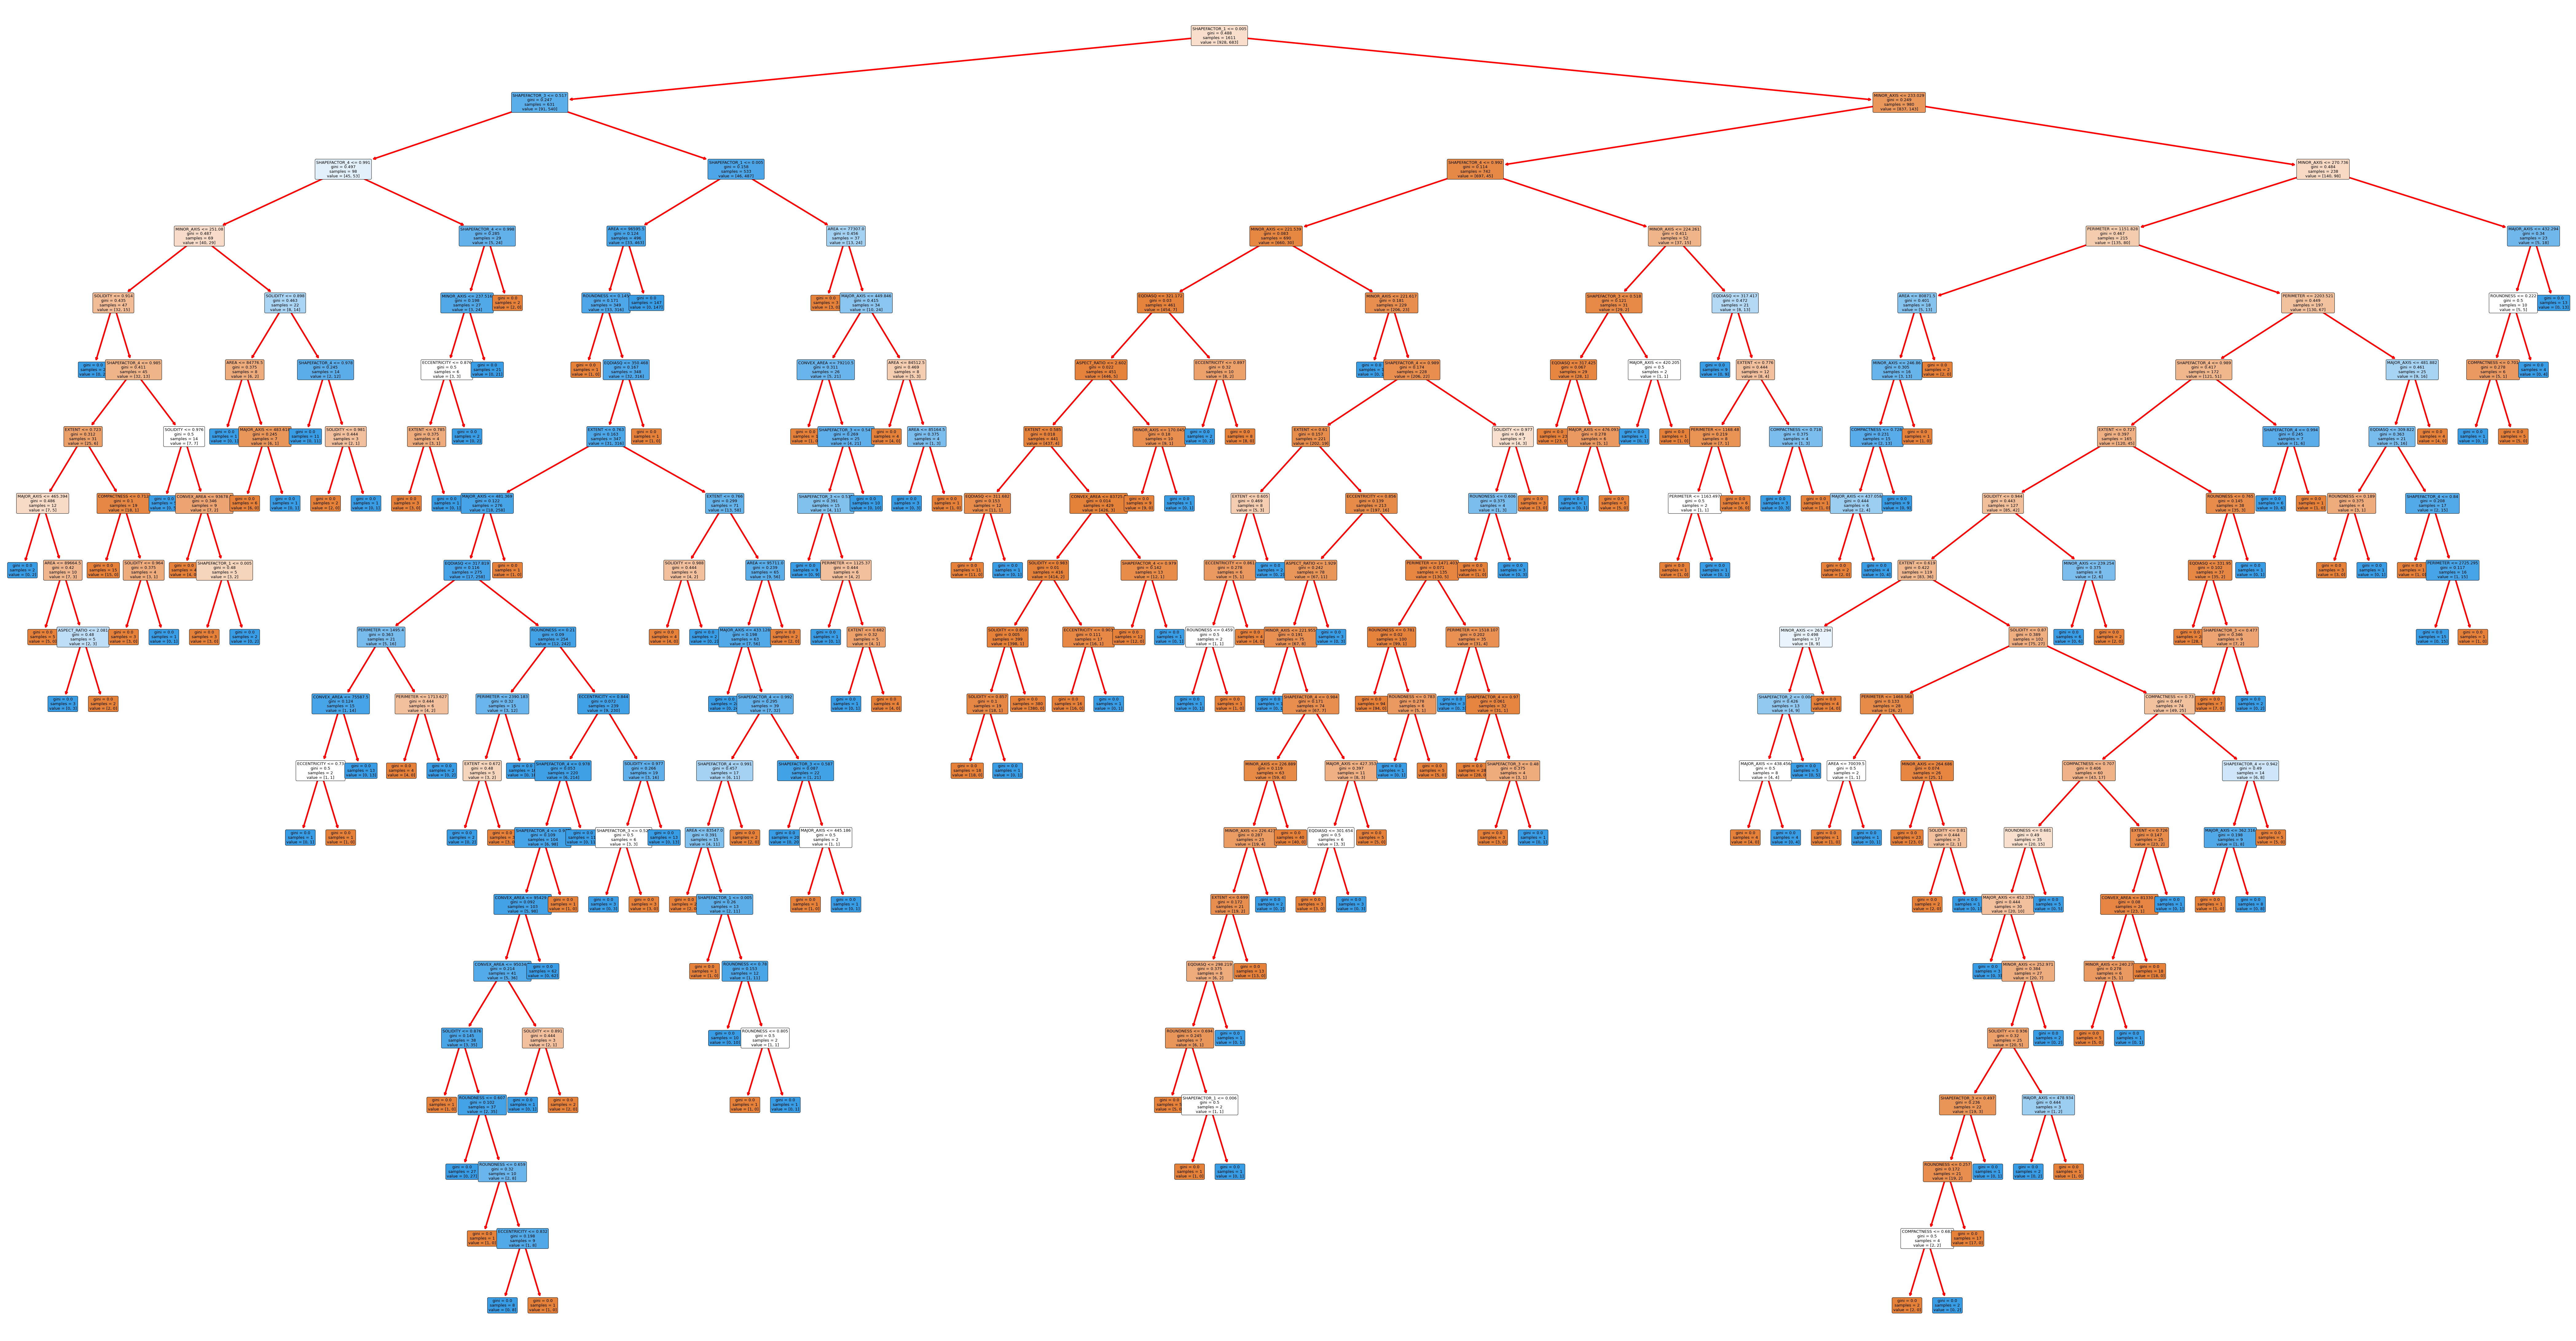

In [293]:
fig, ax= plt.subplots(figsize=(150,80))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(5)

### Un overfiting tremendo, toca tunear los hyper parametros

In [294]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4)
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)

In [295]:
accuracy_score(y_test,ypred)

0.8864059590316573

In [296]:
cvs=cross_val_score(dt,X,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8627907  0.85813953 0.84186047 0.83449883 0.86013986]
CVS Mean: 0.8514858784626226
CVS Standard Deviation: 0.011208654912762852


### Mejor resultado de momento

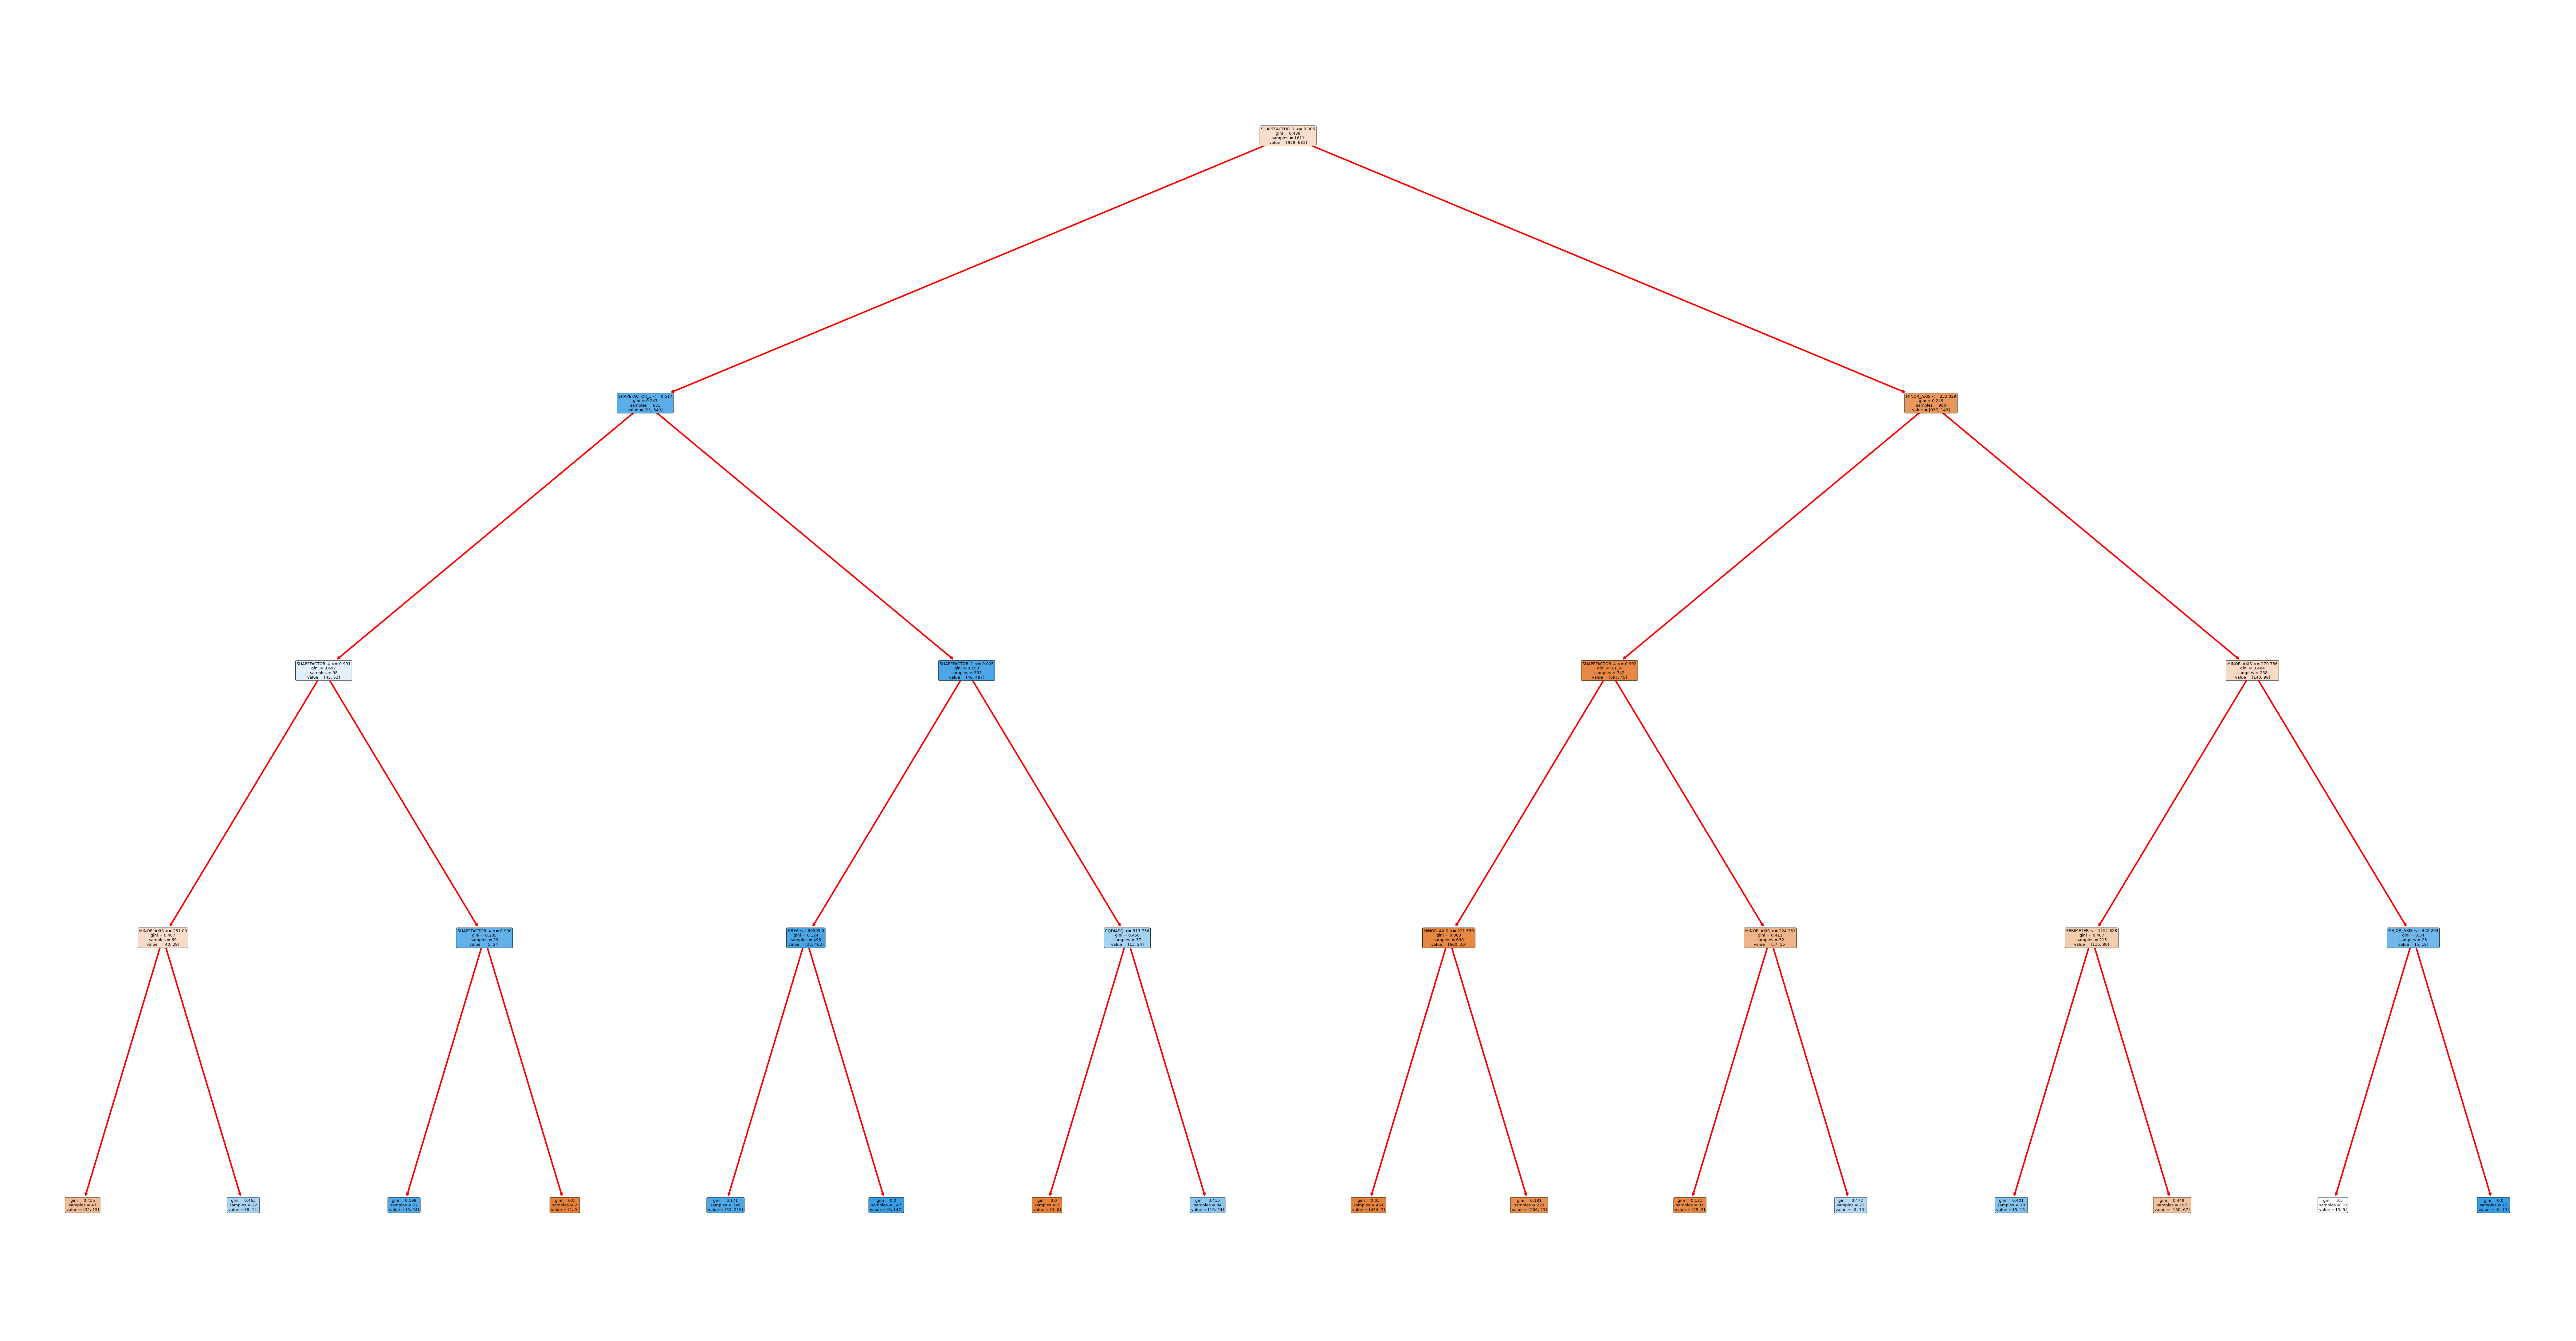

In [297]:
fig, ax= plt.subplots(figsize=(150,80))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(5)

In [298]:
cvs=cross_val_score(dt,X,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8627907  0.85813953 0.84186047 0.83449883 0.86013986]
CVS Mean: 0.8514858784626226
CVS Standard Deviation: 0.011208654912762852


In [299]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       304
         1.0       0.87      0.87      0.87       233

    accuracy                           0.89       537
   macro avg       0.88      0.88      0.88       537
weighted avg       0.89      0.89      0.89       537



In [300]:
matrix2 = confusion_matrix(y_test,ypred)

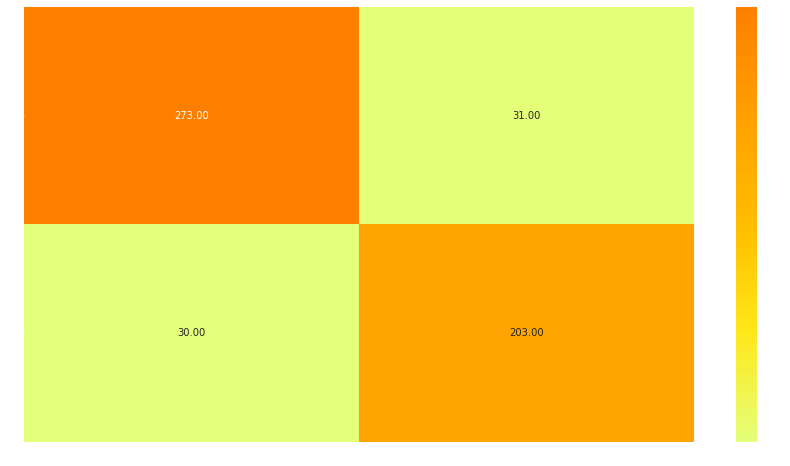

In [301]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(matrix2, annot=True, cmap='Wistia', fmt= ".2f")
    plt.savefig("IMG/arbolerror.png", transparent=True)

# Probamos el Random Forest

In [302]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

In [303]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       304
         1.0       0.86      0.88      0.87       233

    accuracy                           0.88       537
   macro avg       0.88      0.88      0.88       537
weighted avg       0.88      0.88      0.88       537



In [304]:
accuracy_score(y_test,ypred)

0.8845437616387337

In [305]:
cvs=cross_val_score(rf,X,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.87209302 0.8744186  0.85581395 0.85081585 0.87179487]
CVS Mean: 0.8649872608012142
CVS Standard Deviation: 0.009703237628206707


In [306]:
c_matrix = confusion_matrix(y_test, ypred)

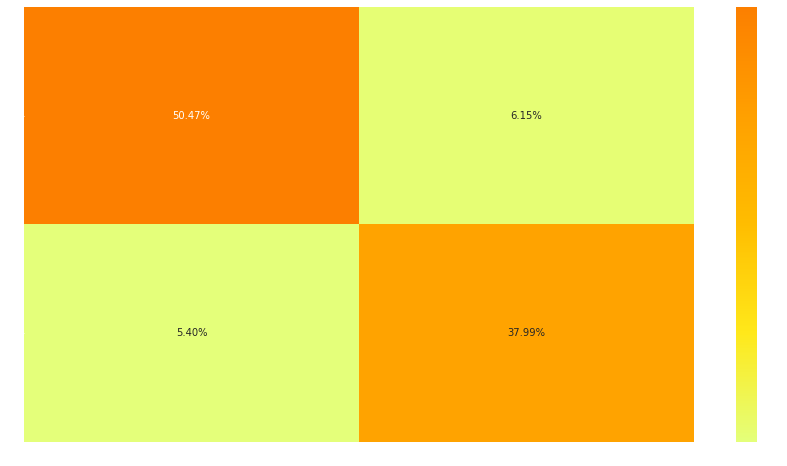

In [307]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(c_matrix/c_matrix.sum(), annot=True, cmap='Wistia', fmt= ".2%")
    plt.savefig("IMG/errorForest.png", transparent=True)